In [164]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import mlab
%matplotlib inline
plt.style.use('ggplot')
import os, sys
os.chdir('/Users/okavvada/Documents/Post-doc/LCA_python/') 
from ParameterValues_MonteCarlo import ParameterValues

In [2]:
from Final_Impact_Model import FinalImpactModel

In [3]:
with open('jupyter_notebooks/defaultParams_jetFuels.js') as json_data:
    data = json.load(json_data)

In [4]:
params = ParameterValues(data)
final_data = pd.DataFrame()

analysis_params = {
    'time_horizon': 100,
    'facility_electricity': 'US',
    'ionic_liquid': 'chlys',
    'feedstock': 'corn_stover',
    'fuel': 'ethanol'
    }

common_params = {
    "IL_rail_km": {"high": 160, "avg": 160, "low": 160, "units": "km"},
    "IL_flatbedtruck_mt_km": {"high": 80, "avg": 80, "low": 80, "units": "km"},
    "etoh_distribution_rail": {"high": 150, "avg": 135, "low": 120, "units": "km"},
    "etoh_distribution_truck": {"high": 55, "avg": 50, "low": 45, "units": "km"},
    "feedstock_distribution_rail": {"high": 0, "avg": 0, "low": 0, "units": "km"}, 
    "feedstock_distribution_truck": {"high": 72, "avg": 80, "low": 88, "units": "km"}}

In [139]:
for i in range(100):
    new_params = params.uncertainty()
    new_params.update({'analysis_params': analysis_params})
    new_params.update({'common': common_params})
    results = FinalImpactModel(new_params, 'buttonGHG', 'jet_fuel')
    final_data = final_data.append(results)
final_data = final_data.drop(['error_bars_min', 'error_bars_max'], 1)

/Users/okavvada/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in divide
/Users/okavvada/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in divide
/Users/okavvada/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in divide
/Users/okavvada/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in divide


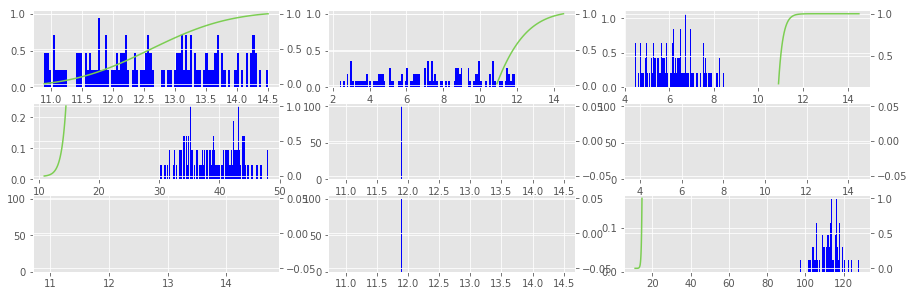

In [222]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(9,3,1)
final_data['Feedstock_Supply_Logistics'].hist(bins=n_bins, normed=1, color='b')
n, bins, patches = plt.hist(np.array(final_data['Feedstock_Supply_Logistics']), bins=bins, normed=1, histtype='step', linewidth=0, cumulative=True)
mu = final_data['Feedstock_Supply_Logistics'].mean()
sigma = mean = final_data['Feedstock_Supply_Logistics'].std()
y = mlab.normpdf(bins, mu, sigma).cumsum()
y /= y[-1]
ax2 = ax.twinx()
ax2.plot(bins, y, '#7cce52', linewidth=1.5)
ax = fig.add_subplot(9,3,2)
final_data['Feedstock_Handling_and_Preparation'].hist(bins=n_bins, normed=1, color='b')
n, bins, patches = plt.hist(np.array(final_data['Feedstock_Handling_and_Preparation']), bins=bins, normed=1, histtype='step', linewidth=0, cumulative=True)
mu = final_data['Feedstock_Handling_and_Preparation'].mean()
sigma = mean = final_data['Feedstock_Handling_and_Preparation'].std()
y = mlab.normpdf(bins, mu, sigma).cumsum()
y /= y[-1]
ax2 = ax.twinx()
ax2.plot(bins, y, '#7cce52', linewidth=1.5)
ax = fig.add_subplot(9,3,3)
final_data['IL_Pretreatment'].hist(bins=n_bins, normed=1, color='b')
n, bins, patches = plt.hist(np.array(final_data['IL_Pretreatment']), bins=bins, normed=1, histtype='step', linewidth=0, cumulative=True)
mu = final_data['IL_Pretreatment'].mean()
sigma = mean = final_data['IL_Pretreatment'].std()
y = mlab.normpdf(bins, mu, sigma).cumsum()
y /= y[-1]
ax2 = ax.twinx()
ax2.plot(bins, y, '#7cce52', linewidth=1.5)
ax = fig.add_subplot(9,3,4)
final_data['Enzymatic_Hydrolysis_and_Fermentation'].hist(bins=n_bins, normed=1, color='b')
n, bins, patches = plt.hist(np.array(final_data['Enzymatic_Hydrolysis_and_Fermentation']), bins=bins, normed=1, histtype='step', linewidth=0, cumulative=True)
mu = final_data['Enzymatic_Hydrolysis_and_Fermentation'].mean()
sigma = mean = final_data['Enzymatic_Hydrolysis_and_Fermentation'].std()
y = mlab.normpdf(bins, mu, sigma).cumsum()
y /= y[-1]
ax2 = ax.twinx()
ax2.plot(bins, y, '#7cce52', linewidth=1.5)
ax = fig.add_subplot(9,3,5)
final_data['Recovery_and_Separation'].hist(bins=n_bins, normed=1, color='b')
n, bins, patches = plt.hist(np.array(final_data['Recovery_and_Separation']), bins=bins, normed=1, histtype='step', linewidth=0, cumulative=True)
mu = final_data['Recovery_and_Separation'].mean()
sigma = mean = final_data['Recovery_and_Separation'].std()
y = mlab.normpdf(bins, mu, sigma).cumsum()
y /= y[-1]
ax2 = ax.twinx()
ax2.plot(bins, y, 'k--', linewidth=1.5)
ax = fig.add_subplot(9,3,6)
final_data['Hydrogeneration_and_Oligomerization'].hist(bins=n_bins, normed=1, color='b')
n, bins, patches = plt.hist(np.array(final_data['Hydrogeneration_and_Oligomerization']), bins=bins, normed=1, histtype='step', linewidth=0, cumulative=True)
mu = final_data['Hydrogeneration_and_Oligomerization'].mean()
sigma = mean = final_data['Hydrogeneration_and_Oligomerization'].std()
y = mlab.normpdf(bins, mu, sigma).cumsum()
y /= y[-1]
ax2 = ax.twinx()
ax2.plot(bins, y, 'k--', linewidth=1.5)
ax = fig.add_subplot(9,3,7)
final_data['Wastewater_Treatment'].hist(bins=n_bins, normed=1, color='b')
n, bins, patches = plt.hist(np.array(final_data['Wastewater_Treatment']), bins=bins, normed=1, histtype='step', linewidth=0, cumulative=True)
mu = final_data['Wastewater_Treatment'].mean()
sigma = mean = final_data['Wastewater_Treatment'].std()
y = mlab.normpdf(bins, mu, sigma).cumsum()
y /= y[-1]
ax2 = ax.twinx()
ax2.plot(bins, y, '#7cce52', linewidth=1.5)
ax = fig.add_subplot(9,3,8)
final_data['Lignin_Utilization'].hist(bins=n_bins, normed=1, color='b')
n, bins, patches = plt.hist(np.array(final_data['Lignin_Utilization']), bins=bins, normed=1, histtype='step', linewidth=0, cumulative=True)
mu = final_data['Lignin_Utilization'].mean()
sigma = mean = final_data['Lignin_Utilization'].std()
y = mlab.normpdf(bins, mu, sigma).cumsum()
y /= y[-1]
ax2 = ax.twinx()
ax2.plot(bins, y, '#7cce52', linewidth=1.5)
ax = fig.add_subplot(9,3,9)
final_data['Total'].hist(bins=n_bins, normed=1, color='b')
n, bins, patches = plt.hist(np.array(final_data['Total']), bins=bins, normed=1, histtype='step', linewidth=0, cumulative=True)
mu = final_data['Total'].mean()
sigma = mean = final_data['Total'].std()
y = mlab.normpdf(bins, mu, sigma).cumsum()
y /= y[-1]
ax2 = ax.twinx()
ax2.plot(bins, y, '#7cce52', linewidth=1.5)

In [6]:
sensi = params.sensitivity(analysis_params, common_params)

In [7]:
names = []
sections = []
lows = []
highs = []

for section, section_vals in sensi.iteritems():
    for item, item_vals in section_vals.iteritems():
        if not item_vals:
            break
        
        names.append(item)
        sections.append(section)
        lows.append(item_vals['low'])
        highs.append(item_vals['high'])

In [8]:
sensitivity = pd.DataFrame([sections, names, lows, highs]).T
sensitivity.columns = [['Section', 'process', 'low', 'high']]

Text(0.5,0,u'GHG emissions for jet fuel ($kgCO_2/kg$)')

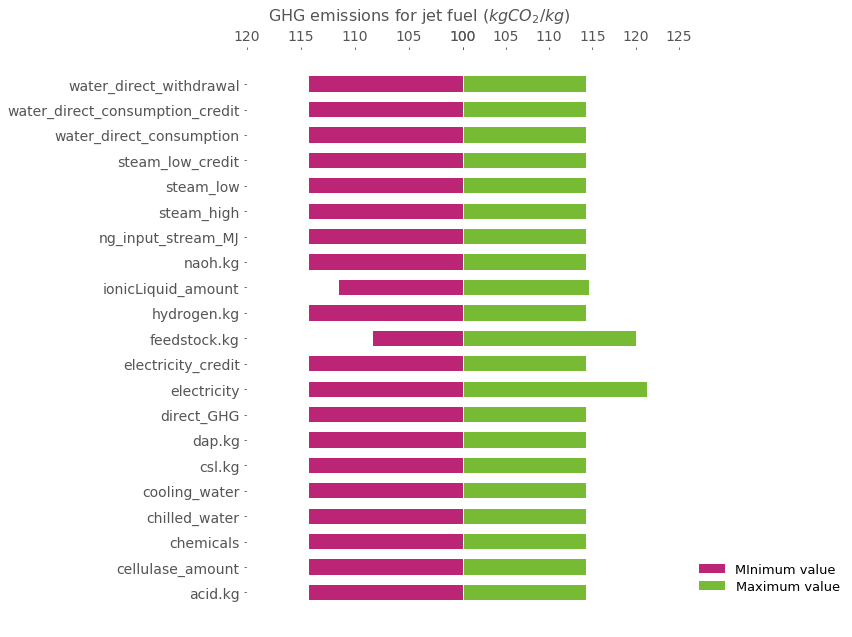

In [216]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(6,8)
plt.xlim(100,120)
ax1.barh(names, lows, 0.6, label='MInimum value', color='#bc2576')
ax1.invert_xaxis()
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
ax1.set_xlim(120,100)
ax1.xaxis.tick_top()
plt.gca().invert_xaxis()
ax2.barh(names, highs, 0.6, label='Maximum value', color='#77ba34')
plt.xlim(100,125)
fig.subplots_adjust(0,0,1,1,0,0)
ax1.set_facecolor((1, 1, 1))
ax2.set_facecolor((1, 1, 1))
ax1.legend(bbox_to_anchor=(2.78, 0.13),fontsize=13, facecolor='white', edgecolor='none')
ax2.legend(bbox_to_anchor=(1.8, 0.1),fontsize=13, facecolor='white', edgecolor='none')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.tick_top()
ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)
plt.xlabel('GHG emissions for jet fuel ($kgCO_2/kg$)', {'horizontalalignment':'right', 'fontsize':16, 'verticalalignment': 'bottom'})

RangeIndex(start=0, stop=58, step=1)